## New Restaurant Recommendations near Edison, NJ (USA) 

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 112kB 13.3MB/s eta 0:00:01
Folium installed
Libraries imported.


## Setting up Foursquare API to call for restaurants around Edison, NJ

In [3]:
CLIENT_ID = 'RXPEEA23IWGR4HNG5PIAZSS2IM1FCTIOYLCXD3GRU2Z5LGMA' # your Foursquare ID
CLIENT_SECRET = '2B3JRTZMUUB5V04SNFF42MYWMTFHXGARVJ4ZPIL4MNX1G0QK' # your Foursquare Secret
ACCESS_TOKEN = 'QBH2NPI2GKJAIPE43251IYAOO2HVYUF5EUYW3130Y5GPQWBQ' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RXPEEA23IWGR4HNG5PIAZSS2IM1FCTIOYLCXD3GRU2Z5LGMA
CLIENT_SECRET:2B3JRTZMUUB5V04SNFF42MYWMTFHXGARVJ4ZPIL4MNX1G0QK


## Coordinates for Edison, NJ

In [4]:
address = 'Edison, NJ'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.5382375 -74.39451734508772


In [5]:
search_query = 'Indian'
radius = 5000
print(search_query + ' .... OK!')


Indian .... OK!


In [6]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=RXPEEA23IWGR4HNG5PIAZSS2IM1FCTIOYLCXD3GRU2Z5LGMA&client_secret=2B3JRTZMUUB5V04SNFF42MYWMTFHXGARVJ4ZPIL4MNX1G0QK&ll=40.5382375,-74.39451734508772&oauth_token=QBH2NPI2GKJAIPE43251IYAOO2HVYUF5EUYW3130Y5GPQWBQ&v=20180604&query=Indian&radius=5000&limit=500'

In [7]:
results_indian = requests.get(url).json()
#results_indian

## Foursquare API does not yeild much data for Indian restaurant around Edison, NJ

In [8]:
# assign relevant part of JSON to venues
venues_indian = results_indian['response']['venues']

# tranform venues into a dataframe
df_indian = json_normalize(venues_indian)
df_indian
df_indian.shape

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


(14, 23)

## Using Explore API from Foursquare to get all of the restuarant data around Edison, NJ

In [9]:
LIMIT = 150 # limit of number of venues returned by Foursquare API


radius = 5000 # define radius



# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RXPEEA23IWGR4HNG5PIAZSS2IM1FCTIOYLCXD3GRU2Z5LGMA&client_secret=2B3JRTZMUUB5V04SNFF42MYWMTFHXGARVJ4ZPIL4MNX1G0QK&v=20180604&ll=40.5382375,-74.39451734508772&radius=5000&limit=150'

In [10]:
results = requests.get(url).json()
'There are {} restaurant around Edison, NJ.'.format(len(results['response']['groups'][0]['items']))
#results
#print(result['response']['venue'].count())

'There are 100 restaurant around Edison, NJ.'

## Only 100 restaurants are found using Explore Foursquare API, need to get more data for modelling

In [11]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
venues = results['response']['groups'][0]['items']
   
nearby_venues = json_normalize(venues) # flatten JSON


# filter columns
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

#nearby_venues['categories'].unique

nearby_venues.shape

#nearby_venues_rest=nearby_venues[nearby_venues['categories'].str.contains("Restaurant")]
#nearby_venues_rest.reset_index(drop=True)
#nearby_venues_rest
#nearby_venues_rest.shape

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


(100, 5)

## Using Yelp "Business Search" API End Point to get 474 restaurant data around Edison, NJ (3 mile radius)

In [13]:
import requests

URL = "https://api.yelp.com/v3/businesses/search"

API_KEY="WPMSZZqGaNTM-2FvdVl2gP2mTmARDAKDY1e1rqxlRPLyi1k-Ov44yvcLY9ELMNvjpsmz7NYycdb0O0fWxlmQ76hFiv7svtgDoO8YUxP9hueTOoE-lvoXEPYcopzmX3Yx"

HEADERS = {'Authorization' : 'bearer %s' % API_KEY}

PARAMETERS = {
            "term":"Restaurants",
            "latitude":"40.5382375",
            "longitude":"-74.39451734508772",
            "radius":"5000",
            "limit":"50",
#            "offset" : "100"
}

response = requests.get(url = URL, params=PARAMETERS, headers=HEADERS)

biz_data=response.json()



biz_data_format=biz_data['businesses']

bizdata_df = json_normalize(biz_data_format) # json normalize



def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories.titles']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['title']

bizdata_df['categories'] = bizdata_df.apply(get_category_type, axis=1)





#for biz in biz_data['businesses']:
#        print(biz['name'], biz['rating'])
      
# columns to keep
filtered_columns = ['name', 'rating', 'price', 'review_count','categories', 'coordinates.latitude','coordinates.longitude', 'location.city', 'location.zip_code', 'location.state']
bizdata_filtered = bizdata_df.loc[:, filtered_columns]

bizdata_filtered.head()



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,rating,price,review_count,categories,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.state
0,Espetadas,4.5,NaN,10,Halal,40.551967,-74.442108,Piscataway,08854,NJ
1,Shanghai Dumpling,4.0,$$,815,Shanghainese,40.507326,-74.413915,Edison,08817,NJ
2,Menya Ramen House,4.5,NaN,12,Ramen,40.541125,-74.361433,Metuchen,08840,NJ
3,Wood Stack Pizza Kitchen - Metuchen,4.0,$$,172,Pizza,40.538500,-74.364520,Metuchen,08840,NJ
4,Jollibee,3.5,NaN,89,Fast Food,40.510949,-74.384359,Edison,08817,NJ


## Yelp Business Search API offset for next 50 business establishments around Edison, NJ

In [14]:
import requests

URL = "https://api.yelp.com/v3/businesses/search"

API_KEY="WPMSZZqGaNTM-2FvdVl2gP2mTmARDAKDY1e1rqxlRPLyi1k-Ov44yvcLY9ELMNvjpsmz7NYycdb0O0fWxlmQ76hFiv7svtgDoO8YUxP9hueTOoE-lvoXEPYcopzmX3Yx"

HEADERS = {'Authorization' : 'bearer %s' % API_KEY}

PARAMETERS = {
            "term":"Restaurants",
            "latitude":"40.5382375",
            "longitude":"-74.39451734508772",
            "radius":"5000",
            "limit":"50",
            "offset" : "100"
}

response = requests.get(url = URL, params=PARAMETERS, headers=HEADERS)

biz_data=response.json()



biz_data_format=biz_data['businesses']



bizdata_df = json_normalize(biz_data_format) # json normalize

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories.titles']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['title']

bizdata_df['categories'] = bizdata_df.apply(get_category_type, axis=1)

#for biz in biz_data['businesses']:
#        print(biz['name'], biz['rating'])
      
# columns to keep
filtered_columns = ['name', 'rating', 'price', 'review_count','categories', 'coordinates.latitude','coordinates.longitude', 'location.city', 'location.zip_code', 'location.state']
bizdata_filtered_1 = bizdata_df.loc[:, filtered_columns]


#bizdata_filtered_1

#        print(biz['rating'])
        
#for biz in biz_data['businesses']:
#        print(biz['rating'])
#        print(biz['price'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [15]:
import requests

URL = "https://api.yelp.com/v3/businesses/search"

API_KEY="WPMSZZqGaNTM-2FvdVl2gP2mTmARDAKDY1e1rqxlRPLyi1k-Ov44yvcLY9ELMNvjpsmz7NYycdb0O0fWxlmQ76hFiv7svtgDoO8YUxP9hueTOoE-lvoXEPYcopzmX3Yx"

HEADERS = {'Authorization' : 'bearer %s' % API_KEY}

PARAMETERS = {
            "term":"Restaurants",
            "latitude":"40.5382375",
            "longitude":"-74.39451734508772",
            "radius":"5000",
            "limit":"50",
            "offset" : "150"
}

response = requests.get(url = URL, params=PARAMETERS, headers=HEADERS)

biz_data=response.json()



biz_data_format=biz_data['businesses']



bizdata_df = json_normalize(biz_data_format) # json normalize

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories.titles']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['title']

bizdata_df['categories'] = bizdata_df.apply(get_category_type, axis=1)

#for biz in biz_data['businesses']:
#        print(biz['name'], biz['rating'])
      
# columns to keep
filtered_columns = ['name', 'rating', 'price', 'review_count','categories', 'coordinates.latitude','coordinates.longitude', 'location.city', 'location.zip_code', 'location.state']
bizdata_filtered_2 = bizdata_df.loc[:, filtered_columns]

#bizdata_filtered_2

#        print(biz['rating'])
        
#for biz in biz_data['businesses']:
#        print(biz['rating'])
#        print(biz['price'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [16]:
import requests

URL = "https://api.yelp.com/v3/businesses/search"

API_KEY="WPMSZZqGaNTM-2FvdVl2gP2mTmARDAKDY1e1rqxlRPLyi1k-Ov44yvcLY9ELMNvjpsmz7NYycdb0O0fWxlmQ76hFiv7svtgDoO8YUxP9hueTOoE-lvoXEPYcopzmX3Yx"

HEADERS = {'Authorization' : 'bearer %s' % API_KEY}

PARAMETERS = {
            "term":"Restaurants",
            "latitude":"40.5382375",
            "longitude":"-74.39451734508772",
            "radius":"5000",
            "limit":"50",
            "offset" : "200"
}

response = requests.get(url = URL, params=PARAMETERS, headers=HEADERS)

biz_data=response.json()



biz_data_format=biz_data['businesses']



bizdata_df = json_normalize(biz_data_format) # json normalize

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories.titles']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['title']

bizdata_df['categories'] = bizdata_df.apply(get_category_type, axis=1)


#for biz in biz_data['businesses']:
#        print(biz['name'], biz['rating'])
      
# columns to keep
filtered_columns = ['name', 'rating', 'price', 'review_count','categories', 'coordinates.latitude','coordinates.longitude', 'location.city', 'location.zip_code', 'location.state']
bizdata_filtered_3 = bizdata_df.loc[:, filtered_columns]

#bizdata_filtered_3

#        print(biz['rating'])
        
#for biz in biz_data['businesses']:
#        print(biz['rating'])
#        print(biz['price'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [17]:
import requests

URL = "https://api.yelp.com/v3/businesses/search"

API_KEY="WPMSZZqGaNTM-2FvdVl2gP2mTmARDAKDY1e1rqxlRPLyi1k-Ov44yvcLY9ELMNvjpsmz7NYycdb0O0fWxlmQ76hFiv7svtgDoO8YUxP9hueTOoE-lvoXEPYcopzmX3Yx"

HEADERS = {'Authorization' : 'bearer %s' % API_KEY}

PARAMETERS = {
            "term":"Restaurants",
            "latitude":"40.5382375",
            "longitude":"-74.39451734508772",
            "radius":"5000",
            "limit":"50",
            "offset" : "250"
}

response = requests.get(url = URL, params=PARAMETERS, headers=HEADERS)

biz_data=response.json()



biz_data_format=biz_data['businesses']



bizdata_df = json_normalize(biz_data_format) # json normalize

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories.titles']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['title']

bizdata_df['categories'] = bizdata_df.apply(get_category_type, axis=1)


#for biz in biz_data['businesses']:
#        print(biz['name'], biz['rating'])
      
# columns to keep
filtered_columns = ['name', 'rating', 'price', 'review_count','categories', 'coordinates.latitude','coordinates.longitude', 'location.city', 'location.zip_code', 'location.state']
bizdata_filtered_4 = bizdata_df.loc[:, filtered_columns]

#bizdata_filtered_4

#        print(biz['rating'])
        
#for biz in biz_data['businesses']:
#        print(biz['rating'])
#        print(biz['price'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [18]:
import requests

URL = "https://api.yelp.com/v3/businesses/search"

API_KEY="WPMSZZqGaNTM-2FvdVl2gP2mTmARDAKDY1e1rqxlRPLyi1k-Ov44yvcLY9ELMNvjpsmz7NYycdb0O0fWxlmQ76hFiv7svtgDoO8YUxP9hueTOoE-lvoXEPYcopzmX3Yx"

HEADERS = {'Authorization' : 'bearer %s' % API_KEY}

PARAMETERS = {
            "term":"Restaurants",
            "latitude":"40.5382375",
            "longitude":"-74.39451734508772",
            "radius":"5000",
            "limit":"50",
            "offset" : "300"
}

response = requests.get(url = URL, params=PARAMETERS, headers=HEADERS)

biz_data=response.json()



biz_data_format=biz_data['businesses']



bizdata_df = json_normalize(biz_data_format) # json normalize

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories.titles']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['title']

bizdata_df['categories'] = bizdata_df.apply(get_category_type, axis=1)

#for biz in biz_data['businesses']:
#        print(biz['name'], biz['rating'])
      
# columns to keep
filtered_columns = ['name', 'rating', 'price', 'review_count','categories', 'coordinates.latitude','coordinates.longitude', 'location.city', 'location.zip_code', 'location.state']
bizdata_filtered_5 = bizdata_df.loc[:, filtered_columns]

#bizdata_filtered_5

#        print(biz['rating'])
        
#for biz in biz_data['businesses']:
#        print(biz['rating'])
#        print(biz['price'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [19]:
import requests

URL = "https://api.yelp.com/v3/businesses/search"

API_KEY="WPMSZZqGaNTM-2FvdVl2gP2mTmARDAKDY1e1rqxlRPLyi1k-Ov44yvcLY9ELMNvjpsmz7NYycdb0O0fWxlmQ76hFiv7svtgDoO8YUxP9hueTOoE-lvoXEPYcopzmX3Yx"

HEADERS = {'Authorization' : 'bearer %s' % API_KEY}

PARAMETERS = {
            "term":"Restaurants",
            "latitude":"40.5382375",
            "longitude":"-74.39451734508772",
            "radius":"5000",
            "limit":"50",
            "offset" : "350"
}

response = requests.get(url = URL, params=PARAMETERS, headers=HEADERS)

biz_data=response.json()



biz_data_format=biz_data['businesses']



bizdata_df = json_normalize(biz_data_format) # json normalize
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories.titles']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['title']

bizdata_df['categories'] = bizdata_df.apply(get_category_type, axis=1)


#for biz in biz_data['businesses']:
#        print(biz['name'], biz['rating'])
      
# columns to keep
filtered_columns = ['name', 'rating', 'price', 'review_count','categories', 'coordinates.latitude','coordinates.longitude', 'location.city', 'location.zip_code', 'location.state']
bizdata_filtered_6 = bizdata_df.loc[:, filtered_columns]

#bizdata_filtered_6

#        print(biz['rating'])
        
#for biz in biz_data['businesses']:
#        print(biz['rating'])
#        print(biz['price'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [20]:
import requests

URL = "https://api.yelp.com/v3/businesses/search"

API_KEY="WPMSZZqGaNTM-2FvdVl2gP2mTmARDAKDY1e1rqxlRPLyi1k-Ov44yvcLY9ELMNvjpsmz7NYycdb0O0fWxlmQ76hFiv7svtgDoO8YUxP9hueTOoE-lvoXEPYcopzmX3Yx"

HEADERS = {'Authorization' : 'bearer %s' % API_KEY}

PARAMETERS = {
            "term":"Restaurants",
            "latitude":"40.5382375",
            "longitude":"-74.39451734508772",
            "radius":"5000",
            "limit":"50",
            "offset" : "400"
}

response = requests.get(url = URL, params=PARAMETERS, headers=HEADERS)

biz_data=response.json()



biz_data_format=biz_data['businesses']



bizdata_df = json_normalize(biz_data_format) # json normalize
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories.titles']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['title']

bizdata_df['categories'] = bizdata_df.apply(get_category_type, axis=1)


#for biz in biz_data['businesses']:
#        print(biz['name'], biz['rating'])
      
# columns to keep
filtered_columns = ['name', 'rating', 'price', 'review_count','categories', 'coordinates.latitude','coordinates.longitude', 'location.city', 'location.zip_code', 'location.state']
bizdata_filtered_7 = bizdata_df.loc[:, filtered_columns]

#bizdata_filtered_7

#        print(biz['rating'])
        
#for biz in biz_data['businesses']:
#        print(biz['rating'])
#        print(biz['price'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [21]:
import requests

URL = "https://api.yelp.com/v3/businesses/search"

API_KEY="WPMSZZqGaNTM-2FvdVl2gP2mTmARDAKDY1e1rqxlRPLyi1k-Ov44yvcLY9ELMNvjpsmz7NYycdb0O0fWxlmQ76hFiv7svtgDoO8YUxP9hueTOoE-lvoXEPYcopzmX3Yx"

HEADERS = {'Authorization' : 'bearer %s' % API_KEY}

PARAMETERS = {
            "term":"Restaurants",
            "latitude":"40.5382375",
            "longitude":"-74.39451734508772",
            "radius":"5000",
            "limit":"50",
            "offset" : "450"
}

response = requests.get(url = URL, params=PARAMETERS, headers=HEADERS)

biz_data=response.json()



biz_data_format=biz_data['businesses']



bizdata_df = json_normalize(biz_data_format) # json normalize
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories.titles']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['title']

bizdata_df['categories'] = bizdata_df.apply(get_category_type, axis=1)


#for biz in biz_data['businesses']:
#        print(biz['name'], biz['rating'])
      
# columns to keep
filtered_columns = ['name', 'rating', 'price', 'review_count','categories', 'coordinates.latitude','coordinates.longitude', 'location.city', 'location.zip_code', 'location.state']
bizdata_filtered_8 = bizdata_df.loc[:, filtered_columns]

#bizdata_filtered_8

#        print(biz['rating'])
        
#for biz in biz_data['businesses']:
#        print(biz['rating'])
#        print(biz['price'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [22]:
#Offset to 500

import requests

URL = "https://api.yelp.com/v3/businesses/search"

API_KEY="WPMSZZqGaNTM-2FvdVl2gP2mTmARDAKDY1e1rqxlRPLyi1k-Ov44yvcLY9ELMNvjpsmz7NYycdb0O0fWxlmQ76hFiv7svtgDoO8YUxP9hueTOoE-lvoXEPYcopzmX3Yx"

HEADERS = {'Authorization' : 'bearer %s' % API_KEY}

PARAMETERS = {
            "term":"Restaurants",
            "latitude":"40.5382375",
            "longitude":"-74.39451734508772",
            "radius":"5000",
            "limit":"50",
            "offset" : "500"
}

response = requests.get(url = URL, params=PARAMETERS, headers=HEADERS)

biz_data=response.json()



biz_data_format=biz_data['businesses']



bizdata_df = json_normalize(biz_data_format) # json normalize
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['categories.titles']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['title']

bizdata_df['categories'] = bizdata_df.apply(get_category_type, axis=1)


#for biz in biz_data['businesses']:
#        print(biz['name'], biz['rating'])
      
# columns to keep
filtered_columns = ['name', 'rating', 'price', 'review_count','categories', 'coordinates.latitude','coordinates.longitude', 'location.city', 'location.zip_code', 'location.state']
bizdata_filtered_9 = bizdata_df.loc[:, filtered_columns]

#bizdata_filtered_9

#        print(biz['rating'])
        
#for biz in biz_data['businesses']:
#        print(biz['rating'])
#        print(biz['price'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


## Combining all of the dataframes containing restaurant business information in increments of 50. Total of 472 restaurant data obtained for Kmean clustering analysis

In [23]:
combined_data = pd.concat([bizdata_filtered, bizdata_filtered_1, bizdata_filtered_2, bizdata_filtered_3, bizdata_filtered_4, bizdata_filtered_5, bizdata_filtered_6, bizdata_filtered_7, bizdata_filtered_8, bizdata_filtered_9], axis=0, ignore_index=True)


combined_data.tail(5)

combined_data.shape

(474, 10)

## Data wrangling to update prices

In [24]:
combined_data.replace("$", "1", inplace = True)
combined_data.replace("$$", "2", inplace = True)
combined_data.replace("$$$", "3", inplace = True)
combined_data.replace("$$$$", "4", inplace = True)

combined_data.replace(np.nan, "2", inplace = True)

## Converting categories from categorical data to numerical for processing

In [32]:
combined_data.groupby('categories').count()

combined_data['categories'].value_counts()

combined_data['categories_int'] = pd.factorize(combined_data.categories)[0]
combined_data[["price"]] = combined_data[["price"]].astype("int")
combined_data.head()


,name,rating,price,review_count,categories,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.state,categories_int
0,Espetadas,4.5,2,10,Halal,40.551967,-74.442108,Piscataway,08854,NJ,0
1,Shanghai Dumpling,4.0,2,815,Shanghainese,40.507326,-74.413915,Edison,08817,NJ,1
2,Menya Ramen House,4.5,2,12,Ramen,40.541125,-74.361433,Metuchen,08840,NJ,2
3,Wood Stack Pizza Kitchen - Metuchen,4.0,2,172,Pizza,40.538500,-74.364520,Metuchen,08840,NJ,3
4,Jollibee,3.5,2,89,Fast Food,40.510949,-74.384359,Edison,08817,NJ,4


## location city has too much of overlap with rating and price, hence will not be considered for evaluation

<AxesSubplot:xlabel='location.city', ylabel='rating'>

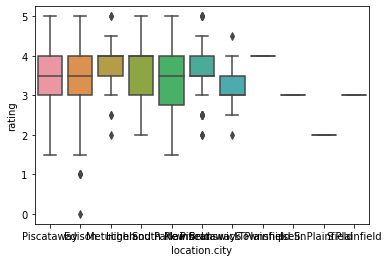

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="location.city", y="rating", data=combined_data)

<AxesSubplot:xlabel='location.city', ylabel='price'>

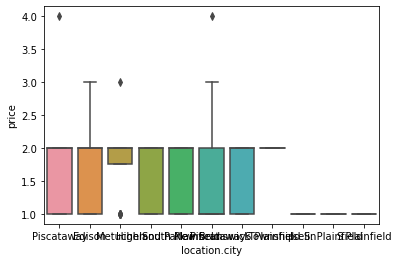

In [33]:
sns.boxplot(x="location.city", y="price", data=combined_data)

## Data analysis of consolidated data points from Yelp's API

In [30]:
combined_data.corr()

,rating,review_count,coordinates.latitude,coordinates.longitude,categories_int
rating,1.000000,0.134305,-0.110273,0.080200,0.019746
review_count,0.134305,1.000000,-0.045985,0.021557,0.005773
coordinates.latitude,-0.110273,-0.045985,1.000000,-0.965558,-0.068556
coordinates.longitude,0.080200,0.021557,-0.965558,1.000000,0.046264
categories_int,0.019746,0.005773,-0.068556,0.046264,1.000000


## Since the p-value is  <  0.001, the correlation between rating and price is statistically significant, although the linear relationship isn't extremely strong (~0.206)

(0.0, 4.150673523485963)

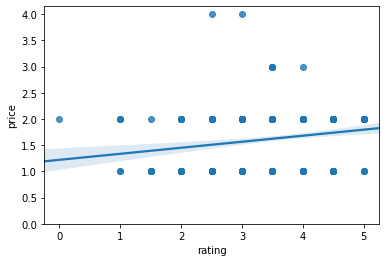

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.regplot(x="rating", y="price", data=combined_data)
plt.ylim(0,)

In [35]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(combined_data['rating'], combined_data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.18054286413787196  with a P-value of P = 7.72268399502361e-05


## Since the p-value is  <  0.001, the correlation between review count and price is statistically significant, although the linear relationship isn't extremely strong (~0.1978)

(0.0, 4.15)

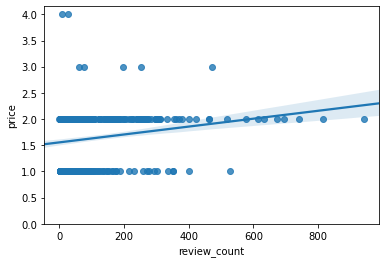

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.regplot(x="review_count", y="price", data=combined_data)
plt.ylim(0,)

In [37]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(combined_data['review_count'], combined_data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.1818236503049978  with a P-value of P = 6.852098206309343e-05


## Formatting overall collected data for Kmean Clustering

In [38]:

#combined_data

formated_data = combined_data.drop(['name', 'categories', 'location.city', 'location.zip_code', 'location.state'], axis=1)

formated_data[["price"]] = formated_data[["price"]].astype("int")

print(formated_data.dtypes)

formated_data

rating                   float64
price                      int64
review_count               int64
coordinates.latitude     float64
coordinates.longitude    float64
categories_int             int64
dtype: object


,rating,price,review_count,coordinates.latitude,coordinates.longitude,categories_int
0,4.5,2,10,40.551967,-74.442108,0
1,4.0,2,815,40.507326,-74.413915,1
2,4.5,2,12,40.541125,-74.361433,2
3,4.0,2,172,40.538500,-74.364520,3
4,3.5,2,89,40.510949,-74.384359,4
...,...,...,...,...,...,...
469,2.5,1,38,40.498010,-74.448560,3
470,2.5,1,3,40.535241,-74.338004,60
471,2.0,2,18,40.502688,-74.451624,85
472,2.5,1,5,40.554622,-74.441267,4


## Standardizing data before Kmeans clustering

In [39]:
from sklearn.preprocessing import StandardScaler

X = formated_data.values[:,:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 1.20224045,  0.70851699, -0.63265828,  0.12735279, -0.0133657 ,
        -1.20060814],
       [ 0.60048546,  0.70851699,  5.66487697, -0.23594278,  0.02784207,
        -1.1545803 ],
       [ 1.20224045,  0.70851699, -0.61701223,  0.03911897,  0.10454944,
        -1.10855246],
       ...,
       [-1.80653448,  0.70851699, -0.57007408, -0.27369148, -0.02727513,
         2.71175857],
       [-1.2047795 , -1.17820803, -0.6717734 ,  0.14895969, -0.01213648,
        -1.01649677],
       [-1.80653448, -1.17820803, -0.6091892 ,  0.17051775,  0.13173296,
        -1.01649677]])

## Executing Kmean Clustering

In [40]:
from sklearn.cluster import KMeans 
num_clusters = 4

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 3 0 0 0 0 0 3 3 3 0 0 0 0 0 0 3 0 1 0 3 3 0 3 3 0 3 0 0 3 0 0 0 0 3 0 0
 0 3 3 3 0 0 3 0 0 3 3 0 0 3 0 0 0 3 1 3 3 0 0 0 0 0 1 0 0 0 0 0 0 3 0 0 3
 0 3 1 3 0 3 0 3 3 0 3 0 3 0 0 3 0 1 0 0 3 3 0 1 0 3 0 0 0 1 3 3 3 1 1 0 3
 0 0 0 0 3 0 0 0 3 0 0 0 0 3 0 0 0 3 3 0 0 0 0 0 1 1 0 0 0 1 0 0 0 3 0 0 1
 0 3 0 0 3 1 0 0 0 0 1 0 0 0 1 0 1 3 0 3 0 1 0 0 0 3 1 3 0 0 1 0 3 0 1 1 1
 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 3 1 0 1 0
 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 3 1 1 0 1 0 3 1 1 0 3 0 1 0 1
 0 3 0 0 0 1 1 0 0 0 1 0 0 1 0 0 3 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1
 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0
 0 1 1 0 0 1 1 2 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 3 0 0 1 0 0
 3 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 3 1 1 1 0 1
 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [41]:
combined_data["Labels"] = labels
combined_data.head()

#formated_data["Labels"] = labels
#formated_data.head()

,name,rating,price,review_count,categories,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.state,categories_int,Labels
0,Espetadas,4.5,2,10,Halal,40.551967,-74.442108,Piscataway,08854,NJ,0,0
1,Shanghai Dumpling,4.0,2,815,Shanghainese,40.507326,-74.413915,Edison,08817,NJ,1,3
2,Menya Ramen House,4.5,2,12,Ramen,40.541125,-74.361433,Metuchen,08840,NJ,2,0
3,Wood Stack Pizza Kitchen - Metuchen,4.0,2,172,Pizza,40.538500,-74.364520,Metuchen,08840,NJ,3,0
4,Jollibee,3.5,2,89,Fast Food,40.510949,-74.384359,Edison,08817,NJ,4,0


## Mapping of all the clusters from Kmeans around Edison, NJ

In [42]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(combined_data['coordinates.latitude'], combined_data['coordinates.longitude'], combined_data['categories'], combined_data['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Grouping clusters to represent their mean values. 

## Cluster 3 seems to be best performing in terms of Ratings, Price, Reviews and Categories

In [43]:
combined_data[["price"]] = combined_data[["price"]].astype("int")



combined_data.groupby('Labels').mean()


,rating,price,review_count,coordinates.latitude,coordinates.longitude,categories_int
Labels,,,,,,
0,3.678879,2.030172,55.831897,40.533433,-74.397669,25.810345
1,3.194444,1.022222,44.894444,40.529253,-74.406307,26.411111
2,2.000000,1.000000,30.000000,43.137989,-89.289574,3.000000
3,3.754098,1.868852,360.803279,40.525489,-74.402306,26.540984


In [44]:
combined_data.groupby('Labels').count()

,name,rating,price,review_count,categories,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.state,categories_int
Labels,,,,,,,,,,,
0,232,232,232,232,232,232,232,232,232,232,232
1,180,180,180,180,180,180,180,180,180,180,180
2,1,1,1,1,1,1,1,1,1,1,1
3,61,61,61,61,61,61,61,61,61,61,61


## Looking into cluster 3 reveals "American" and "Indian" category of restaurants are most repeated and avg higher in terms of Rating, Price and Reviews.Also most of these restuarants are clustered around New Burnswick, NJ city. Tex-Mex is the category to explore, given only one highly rated restaurant and all 3 of them are located in New Brunswick, NJ. 

In [45]:
cluster_label_2 = combined_data[combined_data.Labels == 3]
#cluster_label_2
#cluster_label_2.shape


cluster_label_2.groupby(['categories', 'location.city']).count()

name  rating  price  review_count  \
categories             location.city                                            
American (New)         New Brunswick           2       2      2             2   
American (Traditional) Edison                  1       1      1             1   
                       New Brunswick           1       1      1             1   
Bars                   New Brunswick           1       1      1             1   
Beer Bar               New Brunswick           1       1      1             1   
Cafes                  Edison                  1       1      1             1   
                       Metuchen                1       1      1             1   
Chinese                Edison                  2       2      2             2   
                       New Brunswick           1       1      1             1   
Coffee & Tea           New Brunswick           1       1      1             1   
Creperies              Metuchen                1       1      1             1   
Delis                  Edison                  2       2      2             2   
Desserts               Edison                  1       1      1             1   
Diners                 Edison                  2       2      2             2   
Falafel                Edison                  1       1      1             1   
Gastropubs             New Brunswick           1       1      1             1   
Greek                  Highland Park           1       1      1             1   
Grocery                Edison                  1       1      1             1   
                       Piscataway              1       1      1             1   
Indian                 Edison                  5       5      5             5   
                       Piscataway              2       2      2             2   
Irish                  Metuchen                1       1      1             1   
Italian                Edison                  1       1      1             1   
                       New Brunswick           1       1      1             1   
Japanese               Highland Park           1       1      1             1   
                       South Plainfield        1       1      1             1   
Korean                 Edison                  1       1      1             1   
                       New Brunswick           1       1      1             1   
Latin American         Metuchen                1       1      1             1   
Malaysian              Edison                  1       1      1             1   
Mediterranean          New Brunswick           1       1      1             1   
Middle Eastern         New Brunswick           1       1      1             1   
Mongolian              Edison                  1       1      1             1   
Pakistani              Edison                  2       2      2             2   
Pizza                  Edison                  1       1      1             1   
                       Piscataway Township     1       1      1             1   
Pubs                   New Brunswick           1       1      1             1   
Sandwiches             New Brunswick           1       1      1             1   
Seafood                Edison                  1       1      1             1   
                       South Plainfield        1       1      1             1   
Shanghainese           Edison                  1       1      1             1   
Soul Food              New Brunswick           1       1      1             1   
Sports Bars            Edison                  1       1      1             1   
Sushi Bars             New Brunswick           1       1      1             1   
                       Piscataway              1       1      1             1   
Szechuan               Edison                  2       2      2             2   
Tex-Mex                New Brunswick           1       1      1             1   
Thai                   Highland Park           1       1      1            

In [46]:
print(cluster_label_2.loc[cluster_label_2['categories']=='Tex-Mex'])

       name  rating  price  review_count categories  coordinates.latitude  \
47  Tacoria     4.5      2           517    Tex-Mex             40.497688   

    coordinates.longitude  location.city location.zip_code location.state  \
47             -74.448985  New Brunswick             08901             NJ   

    categories_int  Labels  
47              30       3  


## Only 3 Tex-Mex restaurants in the targeted area with only 1 successful and all of them at New Brunswick, NJ

In [47]:
print(combined_data.loc[combined_data['categories']=='Tex-Mex'])

                                 name  rating  price  review_count categories  \
47                            Tacoria     4.5      2           517    Tex-Mex   
218               Bubbakoo's Burritos     3.5      1            69    Tex-Mex   
394  El Tapatio II Mexican Restaurant     4.0      2             1    Tex-Mex   

     coordinates.latitude  coordinates.longitude  location.city  \
47              40.497688             -74.448985  New Brunswick   
218             40.498119             -74.449180  New Brunswick   
394             40.493137             -74.451177  New Brunswick   

    location.zip_code location.state  categories_int  Labels  
47              08901             NJ              30       3  
218             08901             NJ              30       1  
394             08901             NJ              30       0  


## Top performing Pakistani restaurants, only in Edison location

In [48]:
print(combined_data.loc[combined_data['categories']=='Pakistani'])

                                 name  rating  price  review_count categories  \
79                  Zaika BBQ & Grill     4.0      2           248  Pakistani   
129            Tabaq Restaurant & BBQ     4.0      2           303  Pakistani   
319  Shezan Restaurant & Banquet Hall     3.5      2            51  Pakistani   
328                 Shahnawaz Banquet     3.5      2           124  Pakistani   

     coordinates.latitude  coordinates.longitude location.city  \
79              40.535890             -74.347780        Edison   
129             40.572604             -74.337304        Edison   
319             40.572249             -74.342144        Edison   
328             40.532585             -74.340843        Edison   

    location.zip_code location.state  categories_int  Labels  
79              08837             NJ              39       3  
129             08820             NJ              39       3  
319             08820             NJ              39       0  
328        

## Plotting cluster 3 restaurant data points around Edison, NJ and most of them are clustered around New Brunswick city

In [49]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_label_2['coordinates.latitude'], cluster_label_2['coordinates.longitude'], cluster_label_2['categories'], cluster_label_2['Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters